Experiment 3: Regression Analysis using Linear and Regularized Models

1. Loading dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/train.csv')



2. Data Preprocessing

In [ ]:
#Drop ID columns
df.drop(columns = ['Customer ID','Property ID','Name'],inplace=True)
df.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,...,3.0,809.44,0,NaN,1933.05,4,Rural,1,119933.46,54607.18
1,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,...,1.0,780.40,0,Unpossessed,4952.91,2,Rural,1,54791.00,37469.98
2,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,...,1.0,833.15,0,Unpossessed,988.19,2,Urban,0,72440.58,36474.43
3,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,...,2.0,832.70,1,Unpossessed,NaN,2,Semi-Urban,1,121441.51,56040.54
4,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,...,NaN,745.55,1,Active,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [ ]:
#Define Target and Features
target = "Loan Amount Request (USD)"
X = df.drop(columns = [target],axis = 1)
y = df[target]
df.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,...,3.0,809.44,0,NaN,1933.05,4,Rural,1,119933.46,54607.18
1,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,...,1.0,780.40,0,Unpossessed,4952.91,2,Rural,1,54791.00,37469.98
2,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,...,1.0,833.15,0,Unpossessed,988.19,2,Urban,0,72440.58,36474.43
3,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,...,2.0,832.70,1,Unpossessed,NaN,2,Semi-Urban,1,121441.51,56040.54
4,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,...,NaN,745.55,1,Active,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [ ]:
# Numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill numerical with median
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical with mode
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
print("Numerical Features:\n", num_cols)
print("Categorical Features:\n", cat_cols)

Numerical Features:
 Index(['Age', 'Income (USD)', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Property Age', 'Property Type', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')
Categorical Features:
 Index(['Gender', 'Income Stability', 'Profession', 'Type of Employment',
       'Location', 'Expense Type 1', 'Expense Type 2',
       'Has Active Credit Card', 'Property Location'],
      dtype='object')


In [ ]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
#Updated Feature-Target Split after encoding"
X = df.drop(columns = ["Loan Amount Request (USD)"], axis=1)
y = df["Loan Amount Request (USD)"]

3. EDA

In [ ]:

print(df.info())
print(df.head())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       30000 non-null  int64  
 1   Age                          30000 non-null  int64  
 2   Income (USD)                 30000 non-null  float64
 3   Income Stability             30000 non-null  int64  
 4   Profession                   30000 non-null  int64  
 5   Type of Employment           30000 non-null  int64  
 6   Location                     30000 non-null  int64  
 7   Loan Amount Request (USD)    30000 non-null  float64
 8   Current Loan Expenses (USD)  30000 non-null  float64
 9   Expense Type 1               30000 non-null  int64  
 10  Expense Type 2               30000 non-null  int64  
 11  Dependents                   30000 non-null  float64
 12  Credit Score                 30000 non-null  float64
 13  No. of Defaults 

(30000, 21)

4. Visualization of Feature and Target Distribution


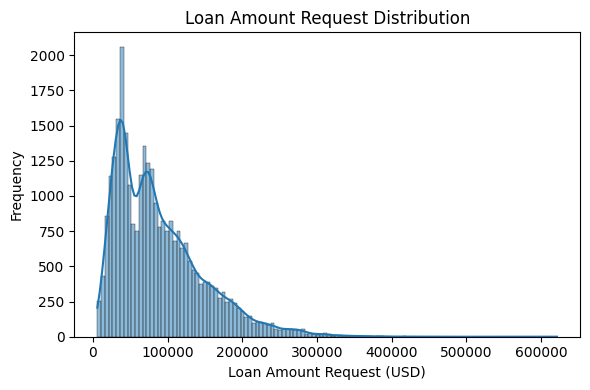

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(df["Loan Amount Request (USD)"], kde=True)
plt.title("Loan Amount Request Distribution")
plt.xlabel("Loan Amount Request (USD)") # Added x-label for clarity
plt.ylabel("Frequency") # Added y-label for clarity
plt.tight_layout() # Ensure layout is tight
plt.savefig('loan_amount_request_distribution_600dpi.png', dpi=200)
plt.show()

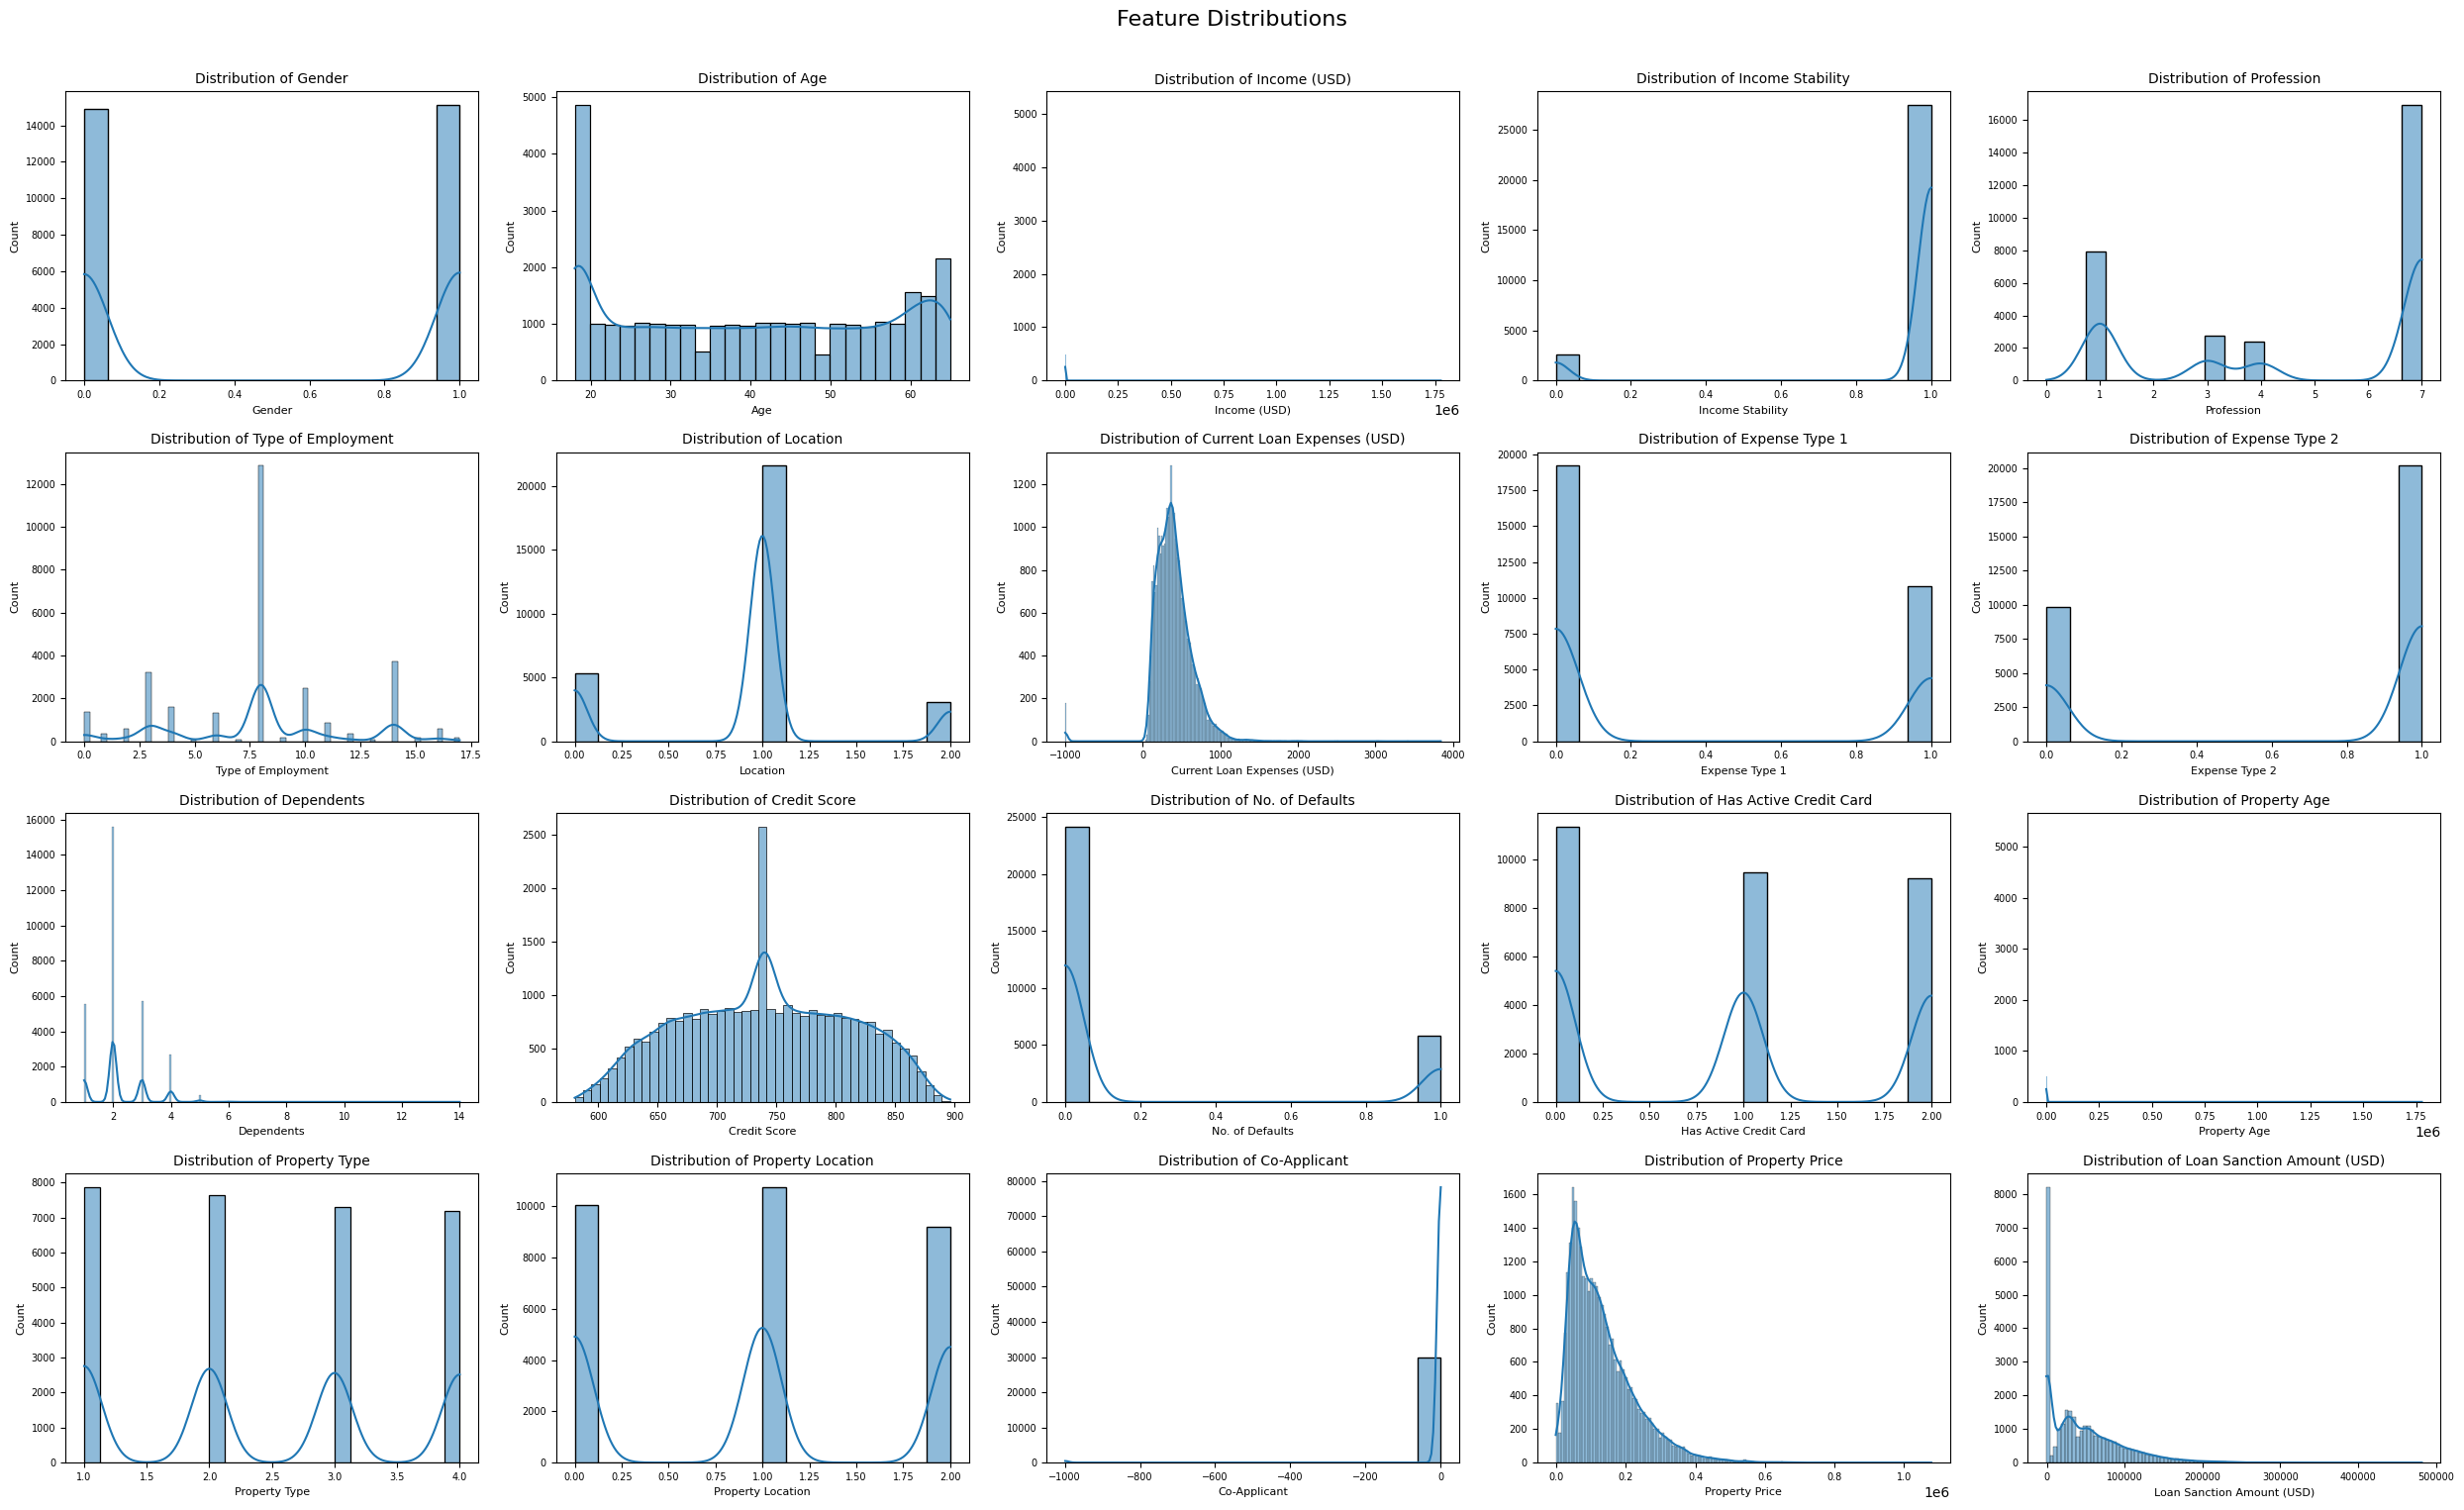

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get feature columns, excluding the target variable
feature_cols = X.columns # X is the DataFrame before scaling, with target dropped
num_features = len(feature_cols)

# Calculate grid dimensions
num_cols_grid = int(np.ceil(np.sqrt(num_features))) # e.g., for 20 features, sqrt is ~4.47, so 5 columns
num_rows_grid = int(np.ceil(num_features / num_cols_grid)) # for 20 features and 5 cols, 4 rows

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows_grid, num_cols_grid, figsize=(5 * num_cols_grid, 4 * num_rows_grid))
axes = axes.flatten() # Flatten the array of axes for easy iteration

# Iterate through each feature and create a histogram
for i, col in enumerate(feature_cols):
    if i < len(axes): # Ensure we don't go out of bounds if num_features is less than total subplots
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}', fontsize=10)
        axes[i].set_xlabel(col, fontsize=8)
        axes[i].set_ylabel('Count', fontsize=8)
        axes[i].tick_params(axis='x', labelsize=7)
        axes[i].tick_params(axis='y', labelsize=7)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust subplot parameters for a tight layout, leaving space for suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Add a main title for the entire figure
plt.suptitle('Feature Distributions', fontsize=16)

# Save the plot with 600 DPI
plt.savefig('feature_distributions_600dpi.png', dpi=200)
plt.show()

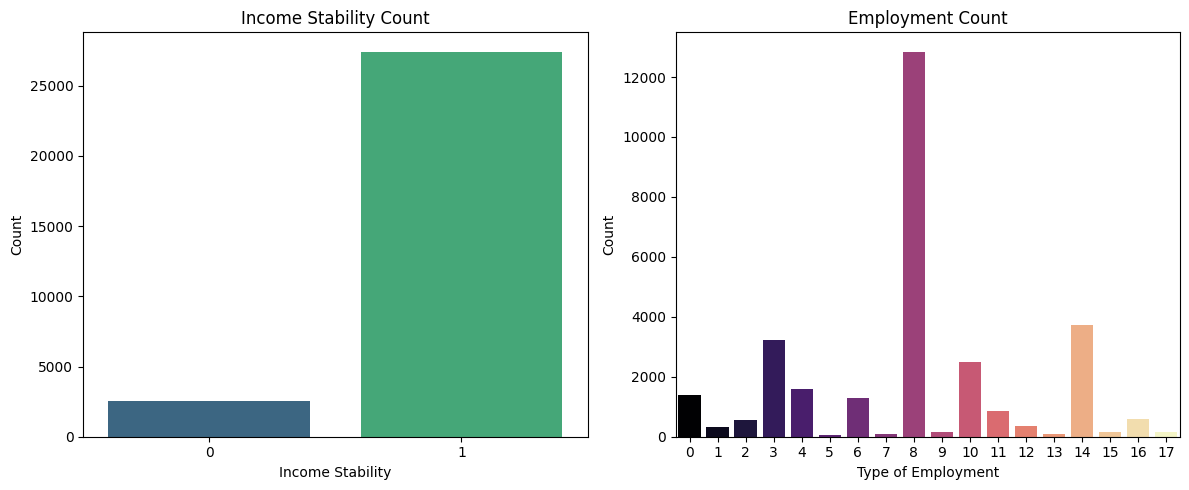

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='Income Stability', data=df, ax=axes[0], palette='viridis', hue='Income Stability', legend=False)
axes[0].set_title('Income Stability Count')
axes[0].set_xlabel('Income Stability')
axes[0].set_ylabel('Count')

sns.countplot(x='Type of Employment', data=df, ax=axes[1], palette='magma', hue='Type of Employment', legend=False)
axes[1].set_title('Employment Count')
axes[1].set_xlabel('Type of Employment')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.savefig('income_employment_counts_600dpi.png', dpi=200)
plt.show()

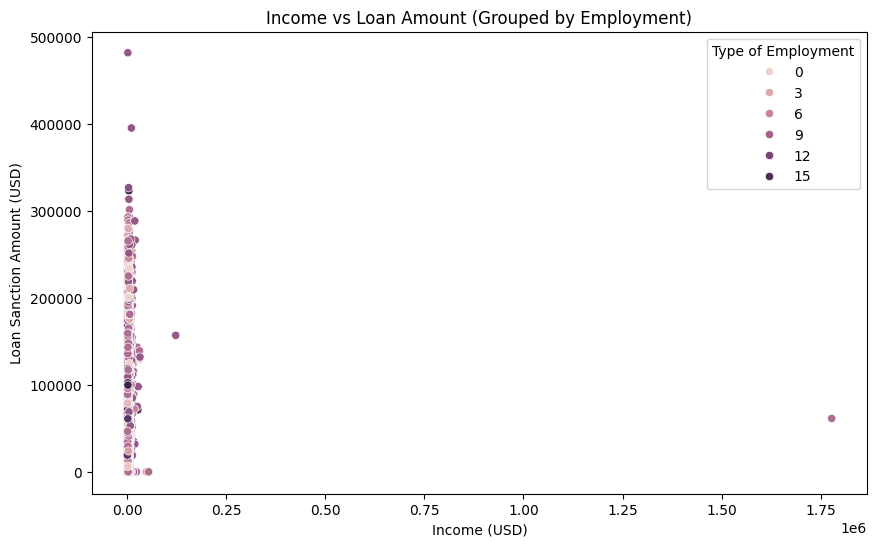

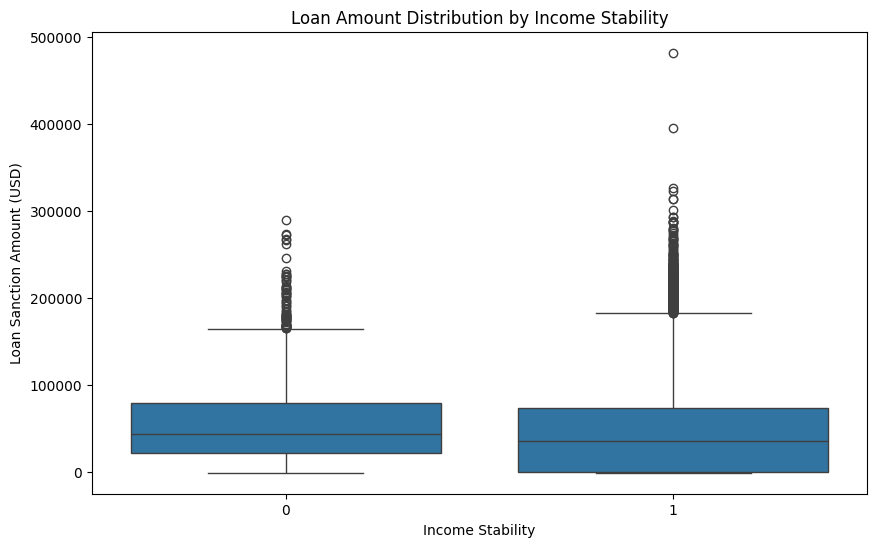

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Relationship between Income and Loan Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income (USD)', y='Loan Sanction Amount (USD)', hue='Type of Employment', data=df)
plt.title('Income vs Loan Amount (Grouped by Employment)')
plt.savefig('income_vs_loan_scatterplot_600dpi.png', dpi=200)
plt.show()

# Boxplot to detect outliers and distribution across categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income Stability', y='Loan Sanction Amount (USD)', data=df)
plt.title('Loan Amount Distribution by Income Stability')
plt.savefig('loan_amount_by_income_stability_boxplot_600dpi.png', dpi=200)
plt.show()

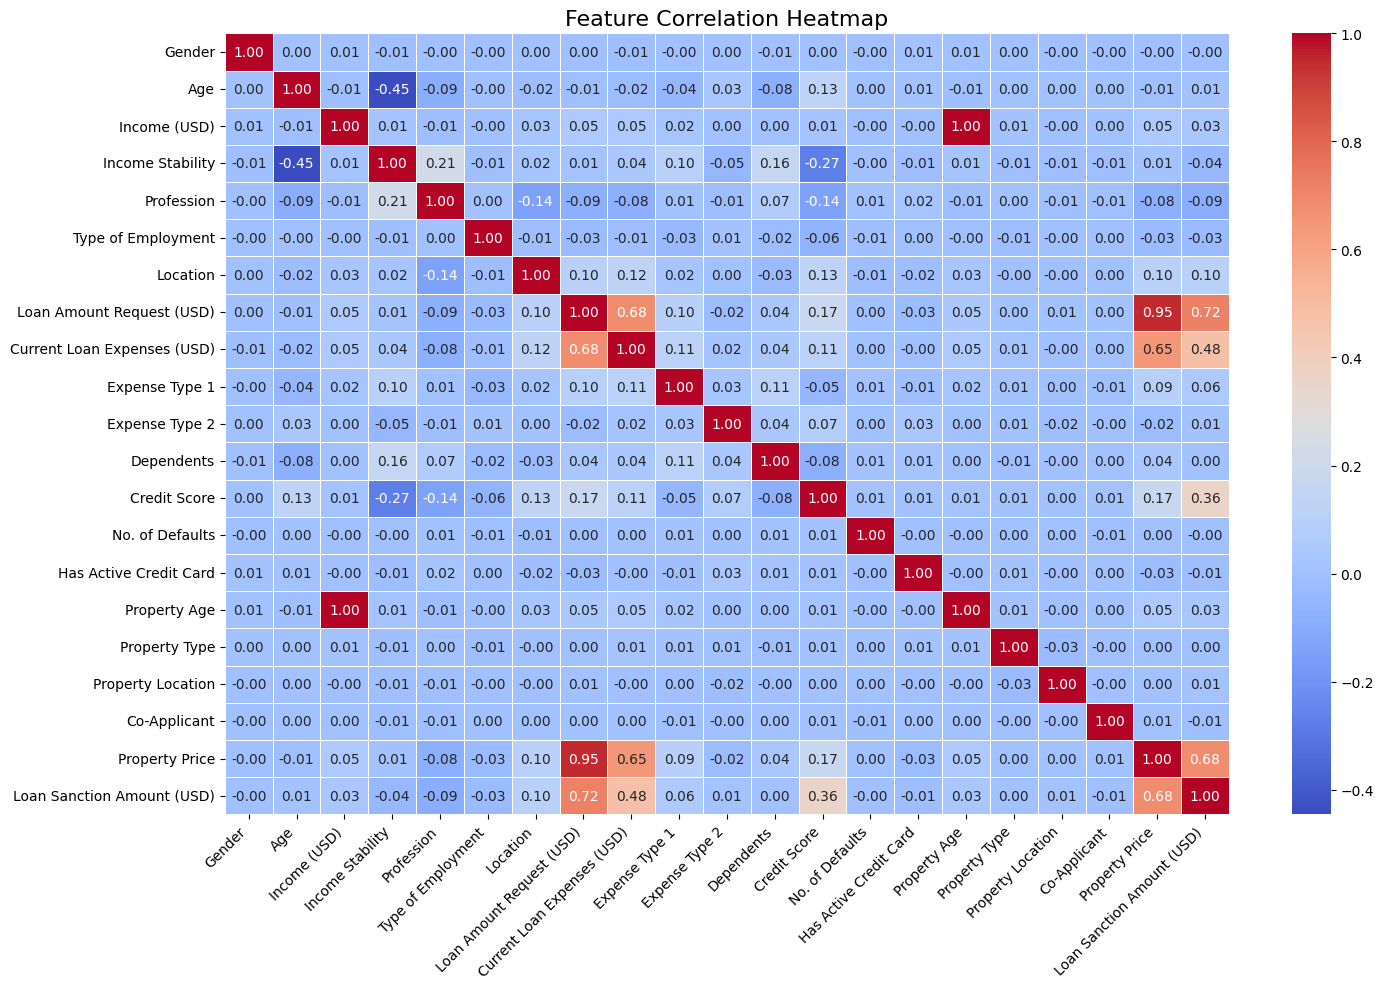

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(15, 10)) # Increased figure size for better readability of the heatmap
# We only calculate correlation for numerical columns
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.yticks(rotation=0) # Ensure y-axis labels are horizontal
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('correlation_heatmap_600dpi.png', dpi=200)
plt.show()

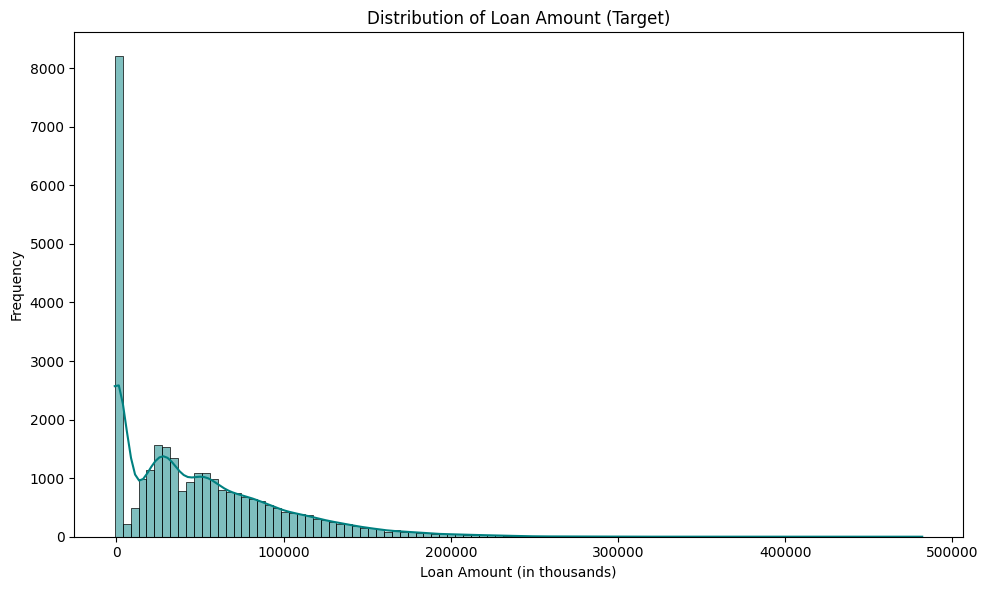

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['Loan Sanction Amount (USD)'], kde=True, color='teal')
plt.title('Distribution of Loan Amount (Target)')
plt.xlabel('Loan Amount (in thousands)')
plt.ylabel('Frequency')
plt.tight_layout() # Ensure tight layout
plt.savefig('loan_sanction_amount_distribution_600dpi.png', dpi=200)
plt.show()

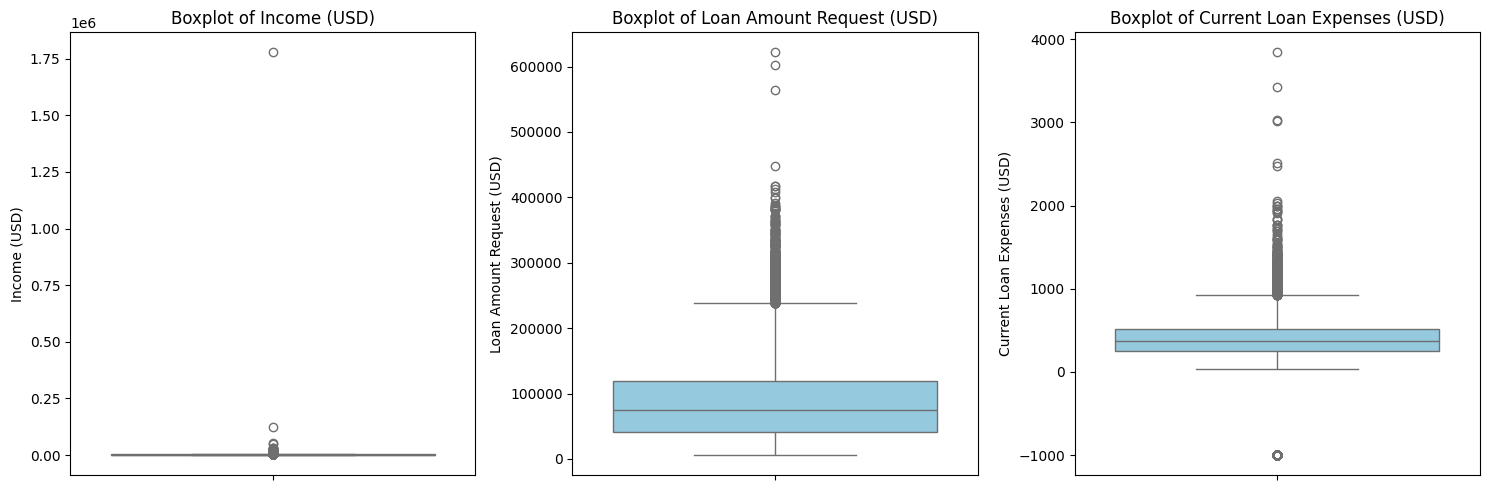

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features to visualize
num_features = ['Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)']

plt.figure(figsize=(15, 5))
for i, col in enumerate(num_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.savefig('numerical_features_boxplots_600dpi.png', dpi=200)
plt.show()

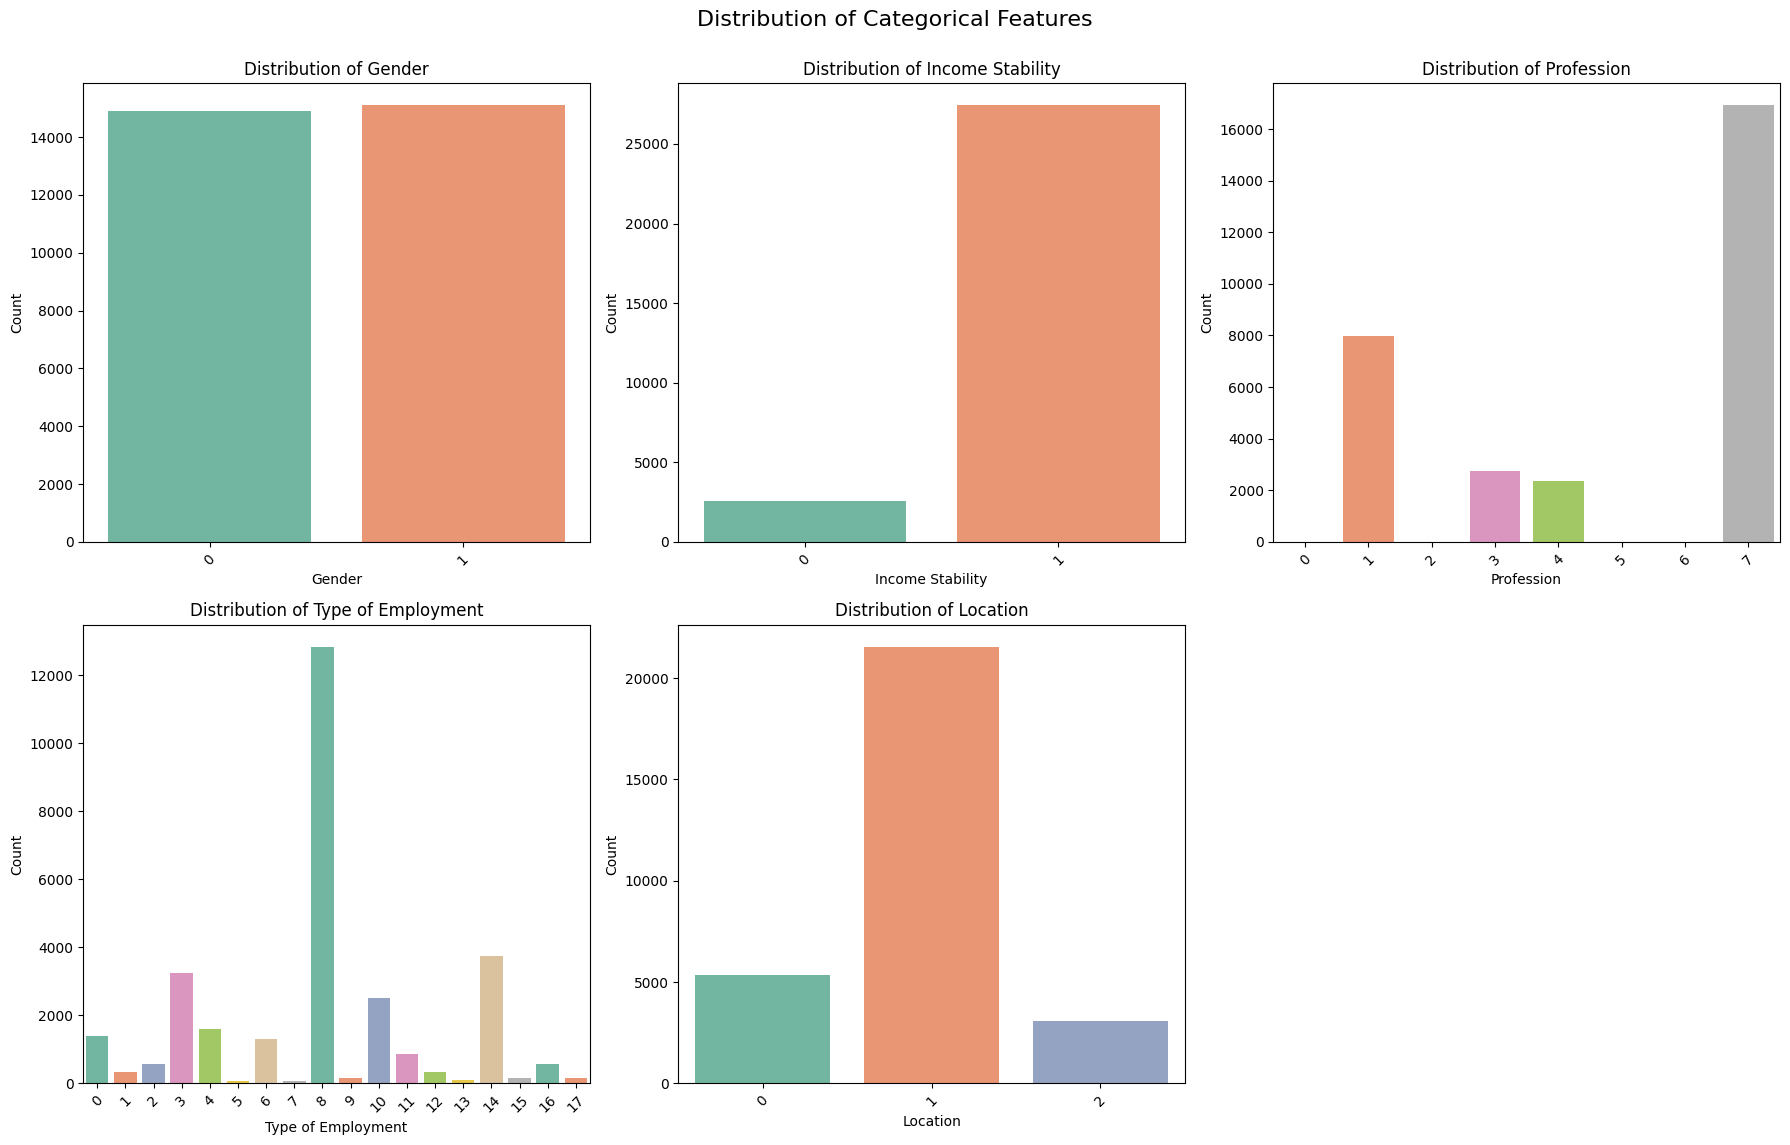

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_features = ['Gender', 'Income Stability', 'Profession', 'Type of Employment', 'Location']

fig, axes = plt.subplots(2, 3, figsize=(18, 12)) # Adjusted figsize for better layout
axes = axes.flatten() # Flatten the array for easy iteration

for i, col in enumerate(cat_features):
    if i < len(axes): # Ensure we don't go out of bounds
        sns.countplot(x=col, data=df, palette='Set2', ax=axes[i], hue=col, legend=False)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
        axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots (in this case, the last one if there are 5 features in a 2x3 grid)
if len(cat_features) < len(axes):
    for j in range(len(cat_features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle
plt.suptitle('Distribution of Categorical Features', fontsize=16, y=0.98) # Add a suptitle
plt.savefig('categorical_features_countplots_600dpi.png', dpi=200)
plt.show()

5. Split the dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ["Loan Amount Request (USD)"], axis=1)
y = df["Loan Amount Request (USD)"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Training shapes: {X_train.shape}, {y_train.shape}")
print(f"Testing shapes: {X_test.shape}, {y_test.shape}")

Training shapes: (24000, 20), (24000,)
Testing shapes: (6000, 20), (6000,)


In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

6. Baseline Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 11405.53
RMSE: 18839.37
R2 Score: 0.90


6. Train Baseline LInear Regression

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Ridge Regression
ridge = Ridge(alpha=1.0) # alpha is the regularization strength
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# 2. Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# 3. Elastic Net
enet = ElasticNet(alpha=0.1, l1_ratio=0.5) # l1_ratio=0.5 means 50% Lasso, 50% Ridge
enet.fit(X_train, y_train)
y_pred_enet = enet.predict(X_test)

In [ ]:
results = {
    "Model": ["Ridge", "Lasso", "Elastic Net"],
    "MAE": [
        mean_absolute_error(y_test, y_pred_ridge),
        mean_absolute_error(y_test, y_pred_lasso),
        mean_absolute_error(y_test, y_pred_enet)
    ],
    "R2 Score": [
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_enet)
    ]
}

print(pd.DataFrame(results))

         Model           MAE  R2 Score
0        Ridge  11405.785266  0.898440
1        Lasso  11405.549832  0.898461
2  Elastic Net  11859.875304  0.865408


8. Hyperparameter tuning using 5-Fold Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the range of alphas to test (logarithmic scale is usually best)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# 1. Tuning Ridge
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)

# 2. Tuning Lasso
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5, scoring='r2')
lasso_cv.fit(X_train, y_train)

print(f"Best Ridge Alpha: {ridge_cv.best_params_}")
print(f"Best Lasso Alpha: {lasso_cv.best_params_}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.902e+12, tolerance: 6.863e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.028e+12, tolerance: 6.758e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.188e+12, tolerance: 6.857e

Best Ridge Alpha: {'alpha': 0.001}
Best Lasso Alpha: {'alpha': 100}


In [ ]:
# Define grid for Elastic Net
enet_params = {
    'alpha': [0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8]
}

enet_cv = GridSearchCV(ElasticNet(), enet_params, cv=5, scoring='r2')
enet_cv.fit(X_train, y_train)

print(f"Best Elastic Net Params: {enet_cv.best_params_}")

Best Elastic Net Params: {'alpha': 0.1, 'l1_ratio': 0.8}


9. Evaluation of models with regression metrics

In [ ]:
# Create a summary of the best models
best_ridge = ridge_cv.best_estimator_
best_lasso = lasso_cv.best_estimator_
best_enet = enet_cv.best_estimator_

models = [best_ridge, best_lasso, best_enet]
model_names = ["Tuned Ridge", "Tuned Lasso", "Tuned Elastic Net"]

for name, model in zip(model_names, models):
    score = model.score(X_test, y_test)
    print(f"{name} R2 Score: {score:.4f}")

Tuned Ridge R2 Score: 0.8985
Tuned Lasso R2 Score: 0.9029
Tuned Elastic Net R2 Score: 0.8871


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Dictionary of our best tuned models
models = {
    "Linear Regression": model,
    "Tuned Ridge": best_ridge,
    "Tuned Lasso": best_lasso,
    "Tuned Elastic Net": best_enet
}

eval_metrics = []

for name, model_obj in models.items():
    preds = model_obj.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    eval_metrics.append({
        "Model": name,
        "MAE": round(mae, 2),
        "RMSE": round(rmse, 2),
        "R2 Score": round(r2, 4)
    })

# Display as a Table
results_df = pd.DataFrame(eval_metrics)
print(results_df.sort_values(by="R2 Score", ascending=False))

               Model       MAE      RMSE  R2 Score
2        Tuned Lasso  11398.23  18421.17    0.9029
1        Tuned Ridge  11405.53  18839.37    0.8985
0  Linear Regression  11557.43  19864.85    0.8871
3  Tuned Elastic Net  11557.43  19864.85    0.8871


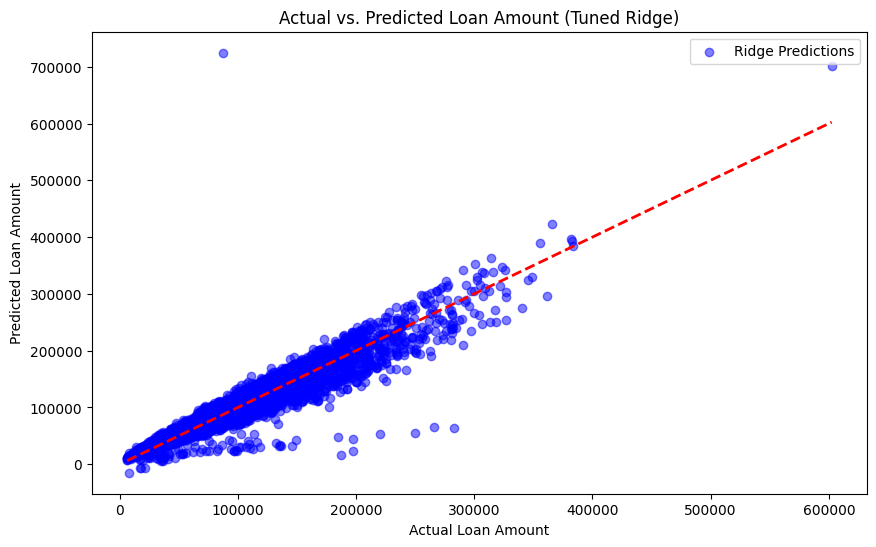

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='blue', label='Ridge Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Loan Amount')
plt.ylabel('Predicted Loan Amount')
plt.title('Actual vs. Predicted Loan Amount (Tuned Ridge)')
plt.legend()
plt.show()

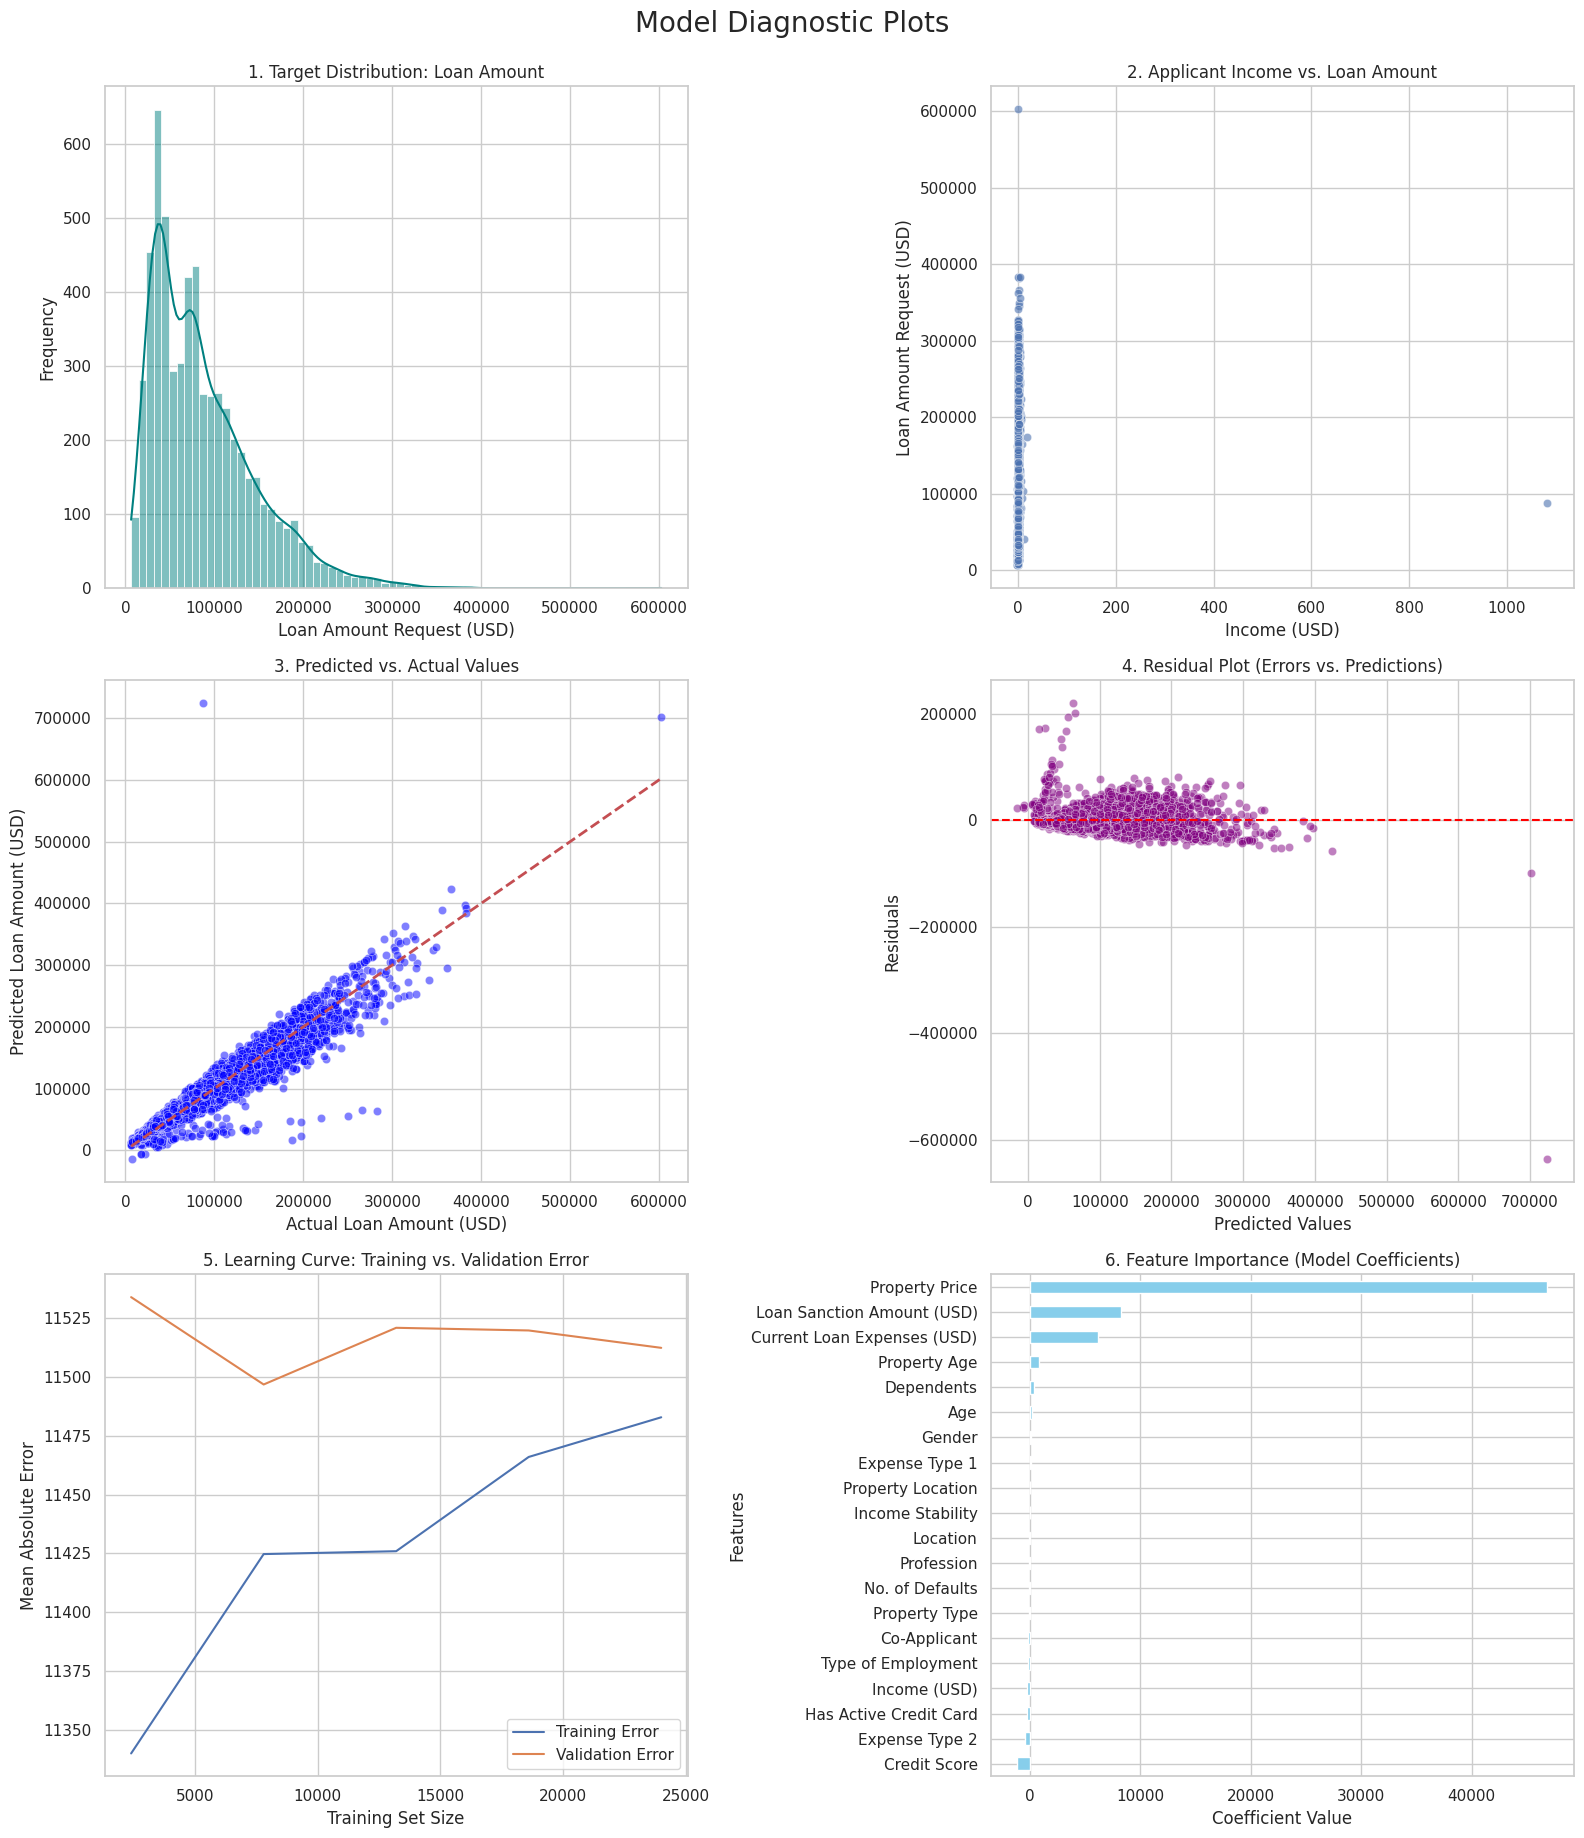

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import learning_curve

# Assuming 'best_ridge' is your final model and X_test, y_test are available
y_pred = best_ridge.predict(X_test)
residuals = y_test - y_pred

# Set the visual style
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# 1. Target Variable Distribution
sns.histplot(y_test, kde=True, ax=axes[0, 0], color='teal')
axes[0, 0].set_title('1. Target Distribution: Loan Amount')
axes[0, 0].set_xlabel('Loan Amount Request (USD)') # Added for clarity
axes[0, 0].set_ylabel('Frequency') # Added for clarity

# 2. Feature vs. Target (Example: ApplicantIncome vs Loan_Amount)
# X.columns.get_loc('Income (USD)') gets the integer index of the column
income_usd_col_idx = X.columns.get_loc('Income (USD)')
sns.scatterplot(x=X_test[:, income_usd_col_idx], y=y_test, ax=axes[0, 1], alpha=0.6)
axes[0, 1].set_title('2. Applicant Income vs. Loan Amount')
axes[0, 1].set_xlabel('Income (USD)') # Add x-label for clarity
axes[0, 1].set_ylabel('Loan Amount Request (USD)') # Added for clarity

# 3. Predicted vs. Actual Values
sns.scatterplot(x=y_test, y=y_pred, ax=axes[1, 0], color='blue', alpha=0.5)
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 0].set_title('3. Predicted vs. Actual Values')
axes[1, 0].set_xlabel('Actual Loan Amount (USD)')
axes[1, 0].set_ylabel('Predicted Loan Amount (USD)')

# 4. Residual Plot (Check for Heteroscedasticity)
sns.scatterplot(x=y_pred, y=residuals, ax=axes[1, 1], color='purple', alpha=0.5)
axes[1, 1].axhline(0, color='red', linestyle='--')
axes[1, 1].set_title('4. Residual Plot (Errors vs. Predictions)')
axes[1, 1].set_xlabel('Predicted Values')
axes[1, 1].set_ylabel('Residuals')

# 5. Training vs. Validation Error (Learning Curve Simulation)
# Ensure X_original_df (unscaled features) and y are available for learning_curve
if 'X_original_df' not in locals():
    X_original_df = df.drop(columns = [target], axis=1)
train_sizes, train_scores, val_scores = learning_curve(best_ridge, X_original_df, y, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
train_mae = -train_scores.mean(axis=1)
val_mae = -val_scores.mean(axis=1)

axes[2, 0].plot(train_sizes, train_mae, label='Training Error')
axes[2, 0].plot(train_sizes, val_mae, label='Validation Error')
axes[2, 0].set_title('5. Learning Curve: Training vs. Validation Error')
axes[2, 0].set_xlabel('Training Set Size') # Added for clarity
axes[2, 0].set_ylabel('Mean Absolute Error') # Added for clarity
axes[2, 0].legend()
axes[2, 0].grid(True)

# 6. Coefficient Comparison Bar Plot
coefs = pd.Series(best_ridge.coef_, index=X.columns).sort_values()
coefs.plot(kind='barh', ax=axes[2, 1], color='skyblue')
axes[2, 1].set_title('6. Feature Importance (Model Coefficients)')
axes[2, 1].set_xlabel('Coefficient Value') # Added for clarity
axes[2, 1].set_ylabel('Features') # Added for clarity

plt.tight_layout()
plt.suptitle('Model Diagnostic Plots', fontsize=20, y=1.02) # Add a suptitle for the entire figure
plt.savefig('model_diagnostics_combined_600dpi.png', dpi=200)
plt.show()